# WeatherPy

* Temperature increases close to the equator.
* Humidity, Cloudiness and Wind Speed are not affected by closeness to the equator.


In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [91]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [92]:
lats = []
lngs = []
max_temps = []
humidities = []
cloudiness = []
wind_speed = []
countries = []
dates = []
cities_data = []

# Open Weather API URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

# Counter for city
i=0

# Collecting data for each city
for city in cities:
    
    query_url = url + "&appid=" + api_key + "&q=" + city
    response = requests.get(query_url).json()
    
    if (response["cod"] == "404"):
        print(f"Skipping...city not found")
    
    else:
        print(f"Processing Record {i} | {city}")
        cities_data.append(city)
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        max_temps.append(response["main"]["temp_max"])
        humidities.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        countries.append(response["sys"]["country"])
        dates.append(response["dt"])
        
        i += 1
        

Processing Record 0 | tasiilaq
Processing Record 1 | hermanus
Processing Record 2 | atar
Processing Record 3 | katobu
Processing Record 4 | iranshahr
Processing Record 5 | jamestown
Processing Record 6 | norman wells
Processing Record 7 | rudnya
Processing Record 8 | mar del plata
Processing Record 9 | barrow
Skipping...city not found
Processing Record 10 | cape town
Processing Record 11 | half moon bay
Processing Record 12 | punta arenas
Processing Record 13 | pahrump
Processing Record 14 | victoria
Processing Record 15 | pisco
Skipping...city not found
Processing Record 16 | malindi
Processing Record 17 | albany
Processing Record 18 | taoudenni
Processing Record 19 | yar-sale
Processing Record 20 | nishihara
Processing Record 21 | tuatapere
Processing Record 22 | lorengau
Processing Record 23 | avera
Processing Record 24 | hobart
Processing Record 25 | calama
Processing Record 26 | bredasdorp
Skipping...city not found
Processing Record 27 | marsa matruh
Processing Record 28 | mataura

Processing Record 221 | aquiraz
Processing Record 222 | ponta do sol
Processing Record 223 | ahipara
Processing Record 224 | alim
Processing Record 225 | malpe
Processing Record 226 | kalmunai
Processing Record 227 | johnstown
Processing Record 228 | northam
Processing Record 229 | margate
Processing Record 230 | el alto
Processing Record 231 | beira
Processing Record 232 | vanavara
Processing Record 233 | krasnolesnyy
Processing Record 234 | sao filipe
Processing Record 235 | talnakh
Processing Record 236 | gurupi
Processing Record 237 | ginir
Processing Record 238 | hunchun
Processing Record 239 | sogne
Processing Record 240 | lakselv
Processing Record 241 | maumere
Processing Record 242 | gamba
Processing Record 243 | wuchi
Processing Record 244 | arlit
Processing Record 245 | kodiak
Processing Record 246 | ondo
Processing Record 247 | bonthe
Skipping...city not found
Processing Record 248 | dalvik
Skipping...city not found
Skipping...city not found
Processing Record 249 | rawson
Pr

Processing Record 443 | hovd
Processing Record 444 | jiujiang
Processing Record 445 | mayskiy
Processing Record 446 | husavik
Processing Record 447 | horta
Processing Record 448 | menongue
Skipping...city not found
Processing Record 449 | chegdomyn
Processing Record 450 | toora-khem
Processing Record 451 | ruwi
Processing Record 452 | la asuncion
Processing Record 453 | butembo
Processing Record 454 | santa cruz del sur
Processing Record 455 | sri aman
Skipping...city not found
Processing Record 456 | qixingtai
Processing Record 457 | bathsheba
Processing Record 458 | everett
Processing Record 459 | southbridge
Processing Record 460 | rabaul
Processing Record 461 | selikhino
Processing Record 462 | kenora
Processing Record 463 | yakuplu
Processing Record 464 | mogzon
Processing Record 465 | isla mujeres
Processing Record 466 | dali
Processing Record 467 | tadine
Processing Record 468 | nampula
Processing Record 469 | katsuura
Processing Record 470 | willowmore
Processing Record 471 | a

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [93]:
# Create data frame 
city_data_df = pd.DataFrame({"City" : cities_data, "Cloudiness" : cloudiness, "Country" : countries, "Date" : dates,
                            "Humidity" : humidities, "Lat" : lats, "Lng" : lngs, "Max Temp" : max_temps, 
                             "Wind Speed" : wind_speed})
# Export data frame to CSV
export_csv = city_data_df.to_csv("Resources/city_data.csv")

# Display data frame
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tasiilaq,100,GL,1562131537,76,65.61,-37.64,41.24,13.20
1,hermanus,59,ZA,1562131529,82,-34.42,19.24,62.01,11.99
2,atar,0,MR,1562131684,24,20.52,-13.05,87.50,14.34
3,katobu,89,ID,1562131684,88,-4.94,122.53,77.60,5.44
4,iranshahr,0,IR,1562131684,31,27.21,60.69,100.40,9.17
5,jamestown,9,AU,1562131534,64,-33.21,138.60,57.80,8.84
6,norman wells,75,CA,1562131685,76,65.28,-126.83,57.20,9.17
7,rudnya,51,RU,1562131685,55,50.80,44.56,71.84,8.32
8,mar del plata,99,AR,1562131530,90,-46.43,-67.52,30.98,10.98
9,barrow,23,AR,1562131686,70,-38.31,-60.23,41.24,13.98


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

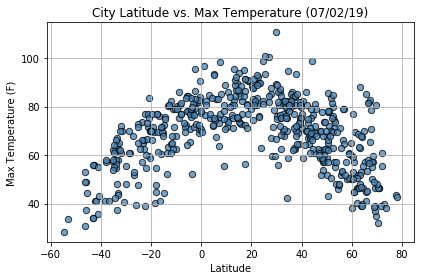

In [94]:
city_data_df.plot.scatter(x='Lat', y='Max Temp', s=40,c='steelblue', edgecolors='black', grid=True, alpha = '0.75')

date1 = city_data_df.iloc[0]["Date"]
current_date = datetime.fromtimestamp(date1).strftime("%m/%d/%y")

plt.title(f'City Latitude vs. Max Temperature ({current_date})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.tight_layout()
plt.savefig("Images/Lat_Temp_Plot.png")
plt.show()

#### Latitude vs. Humidity Plot

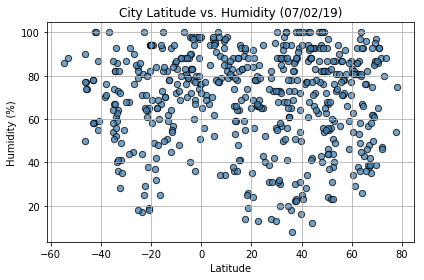

In [95]:
city_data_df.plot.scatter(x='Lat', y='Humidity', s=40,c='steelblue', edgecolors='black', grid=True, alpha = '0.75')

plt.title(f'City Latitude vs. Humidity ({current_date})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()
plt.savefig("Images/Lat_Humidity_Plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

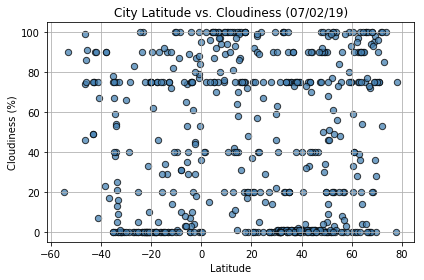

In [96]:
city_data_df.plot.scatter(x='Lat', y='Cloudiness', s=40,c='steelblue', edgecolors='black', grid=True, alpha = '0.75')

plt.title(f'City Latitude vs. Cloudiness ({current_date})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()
plt.savefig("Images/Lat_Cloudiness_Plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

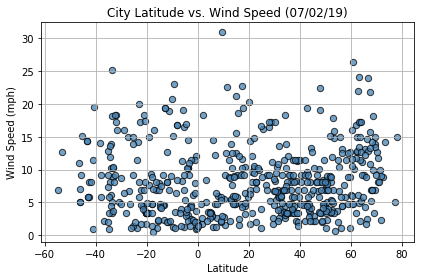

In [97]:
city_data_df.plot.scatter(x='Lat', y='Wind Speed', s=40,c='steelblue', edgecolors='black', grid=True, alpha = '0.75')

plt.title(f'City Latitude vs. Wind Speed ({current_date})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.tight_layout()
plt.savefig("Images/Lat_WindSpeed_Plot.png")
plt.show()